In [511]:
import pandas as pd
import matplotlib.pyplot as plt

In [512]:
# loading the sheets
file_path = r'question_1_2.xlsx'
measurements_df = pd.read_excel(file_path, sheet_name='Measurements' ,skiprows=1)  
specifications_df = pd.read_excel(file_path, sheet_name='Specifications' ,skiprows=1)
production_sequence_df = pd.read_excel(file_path, sheet_name='Production_Sequence' ,skiprows=1)

measurements_df.head()

,Lot No,Unit,Product Code,T_Height,T_Weight
0,DLS0081,1,LIF001_B,8.644,384.63
1,DLS0081,2,LIF001_B,9.228,384.63
2,DLS0081,3,LIF001_B,8.811,385.19
3,DLS0081,4,LIF001_B,9.080,385.19
4,DLS0082,1,LIF001_Y,10.549,375.00


In [513]:
# checking if there are missing data
null_columns = measurements_df.isnull().any()
print("\nChecking if measurements_df contains missing data:\n", null_columns)


Checking if measurements_df contains missing data:
 Lot No          False
Unit            False
Product Code    False
T_Height        False
T_Weight        False
dtype: bool


In [514]:
specifications_df.head()

,Product Code,T_Name,LSL,USL,Target
0,LIF001_B,T_height,7.22,10.57,8.78
1,LIF001_Y,T_height,6.78,10.07,8.36
2,LIF002_R,T_height,7.22,10.57,8.78
3,LIF002_Y,T_height,6.78,10.07,8.36
4,LIF001_B,T_weight,360.00,470.00,410.00


In [515]:
# checking if there are missing data 
null_columns = specifications_df.isnull().any()
print("\nChecking if specifications_df contains missing data:\n", null_columns)


Checking if specifications_df contains missing data:
 Product Code    False
T_Name          False
LSL             False
USL             False
Target          False
dtype: bool


In [516]:
production_sequence_df.head()

,Order ID,Date,Product Family,Variant
0,1,2022-05-14,LIF001,B
1,2,2022-06-02,LIF001,Y
2,3,2022-06-17,LIF001,B
3,4,2022-07-01,LIF003,B
4,5,2022-07-17,LIF002,R


In [517]:
# checking if there are missing data 
null_columns = production_sequence_df.isnull().any()
print("\nChecking if production_sequence_df contains missing data:\n", null_columns)


Checking if production_sequence_df contains missing data:
 Order ID          False
 Date             False
Product Family    False
Variant           False
dtype: bool


## Question 1.1

In [518]:
# grouping by product code and calculating the mean and sample standard deviation for height and weight
result = measurements_df.groupby('Product Code').agg({
    'T_Height': ['mean', 'std'],
    'T_Weight': ['mean', 'std']
}).reset_index()

# renaming the columns for clarity
result.columns = ['Product_Code', 'Mean_Height', 'Std_Height', 'Mean_Weight', 'Std_Weight']

result

,Product_Code,Mean_Height,Std_Height,Mean_Weight,Std_Weight
0,LIF001_B,8.94075,0.262551,384.9100,0.323316
1,LIF001_Y,10.26850,0.852276,382.8250,7.287700
2,LIF002_R,9.30775,0.893526,314.7225,17.176708
3,LIF002_Y,8.18975,0.452906,523.7950,6.458506


## Question 1.2

In [519]:
# product family mapping
product_family_mapping = {
    'LIF001_B': 'LIF001',
    'LIF001_Y': 'LIF001',
    'LIF002_R': 'LIF002',
    'LIF002_Y': 'LIF002'
}

# determining the defects based on USL
product_code_defects = [] 
lot_family_defects = []

for index, row in measurements_df.iterrows():
    product_code = row['Product Code']
    height = row['T_Height']
    weight = row['T_Weight']
    
    # getting the USL for height and weight 
    height_usl = specifications_df[(specifications_df['Product Code'] == product_code) & 
                                   (specifications_df['T_Name'] == 'T_height')]['USL'].values[0]
    weight_usl = specifications_df[(specifications_df['Product Code'] == product_code) & 
                                   (specifications_df['T_Name'] == 'T_weight')]['USL'].values[0]
    
    # checking for defects and appending the defects to the lists
    if height > height_usl or weight > weight_usl:
        product_code_defects.append(product_code)
        lot_family_defects.append((row['Lot No'], product_family_mapping[product_code]))

# counting defects by product code
defect_counts = pd.Series(product_code_defects).value_counts()

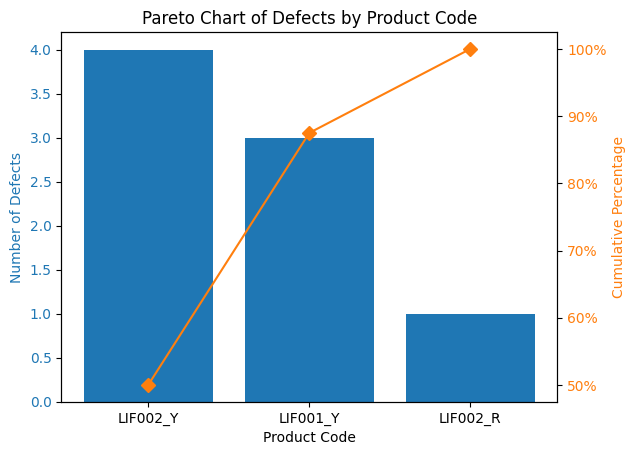

LIF002_Y    4
LIF001_Y    3
LIF002_R    1
Name: count, dtype: int64

In [520]:
# pLotting pareto chart by product code
defect_counts.sort_values(ascending=False, inplace=True)
cumulative_sum = defect_counts.cumsum()
cumulative_percentage = 100 * cumulative_sum / defect_counts.sum()

fig, ax1 = plt.subplots()

ax1.bar(defect_counts.index, defect_counts, color='C0')
ax1.set_xlabel('Product Code')
ax1.set_ylabel('Number of Defects', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()
ax2.plot(defect_counts.index, cumulative_percentage, color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Pareto Chart of Defects by Product Code')
plt.show()

defect_counts

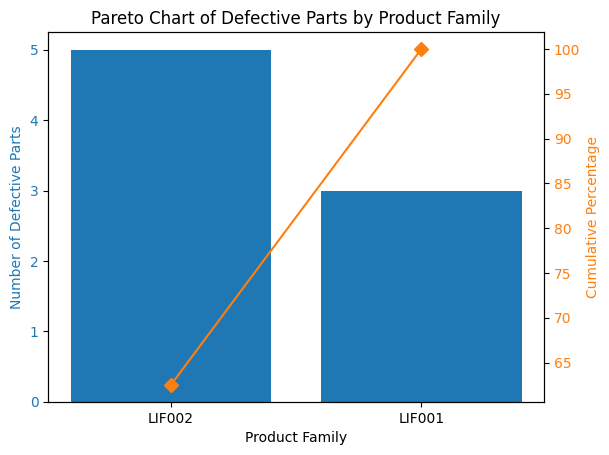

In [521]:
# calculate cumulative percentage
defective_counts['Cumulative_Percentage'] = defective_counts['Defective_Count'].cumsum() / defective_counts['Defective_Count'].sum() * 100

# plotting pareto chart by product family
fig, ax1 = plt.subplots()

# bar plot
ax1.bar(defective_counts['Product_Family'], defective_counts['Defective_Count'], color='C0')
ax1.set_xlabel('Product Family')
ax1.set_ylabel('Number of Defective Parts', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(defective_counts['Product_Family'], defective_counts['Cumulative_Percentage'], color='C1', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title('Pareto Chart of Defective Parts by Product Family')
plt.show()


#### As demonstrated in the above pareto chart, product family LIF002 is more defective than LIF001

## Question 1.3

In [522]:
# capitalizing each third letter in T_Name rows to match with T_Height and T_Weight rows
def capitalize_third_letter(s):
    if len(s) >= 3:
        return s[:2] + s[2].upper() + s[3:]
    return s

specifications_df['T_Name'] = specifications_df['T_Name'].apply(capitalize_third_letter)

print(specifications_df)

  Product Code    T_Name     LSL     USL  Target
0     LIF001_B  T_Height    7.22   10.57    8.78
1     LIF001_Y  T_Height    6.78   10.07    8.36
2     LIF002_R  T_Height    7.22   10.57    8.78
3     LIF002_Y  T_Height    6.78   10.07    8.36
4     LIF001_B  T_Weight  360.00  470.00  410.00
5     LIF001_Y  T_Weight  329.00  500.00  410.00
6     LIF002_R  T_Weight  329.00  500.00  385.00
7     LIF002_Y  T_Weight  329.00  500.00  410.00


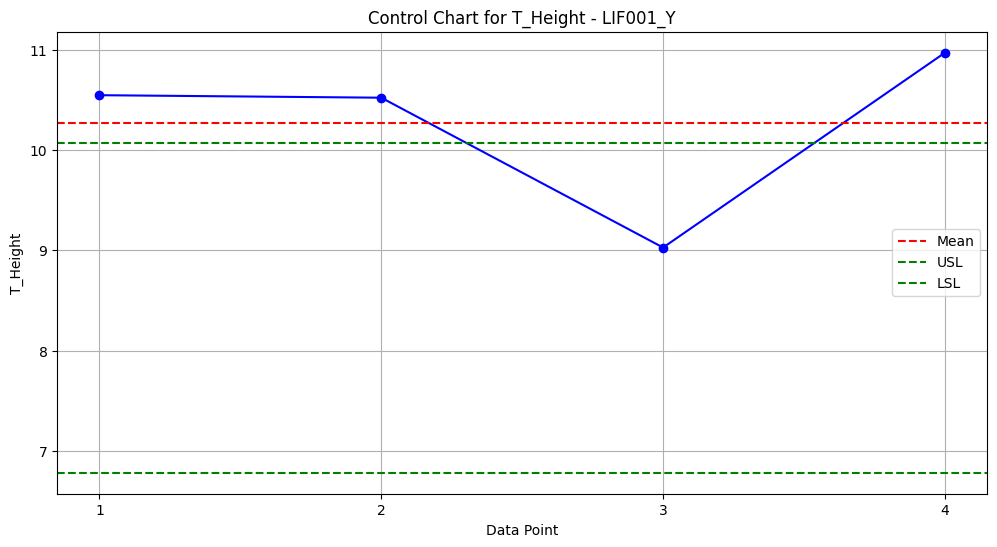

In [523]:

# getting the data for LIF001_Y and LIF002_Y
lif001_y = measurements_df[measurements_df['Product Code'] == 'LIF001_Y']
lif002_y = measurements_df[measurements_df['Product Code'] == 'LIF002_Y']

# getting the LSL and USL for T_Height and T_Weight
lif001_y_specs = specifications_df[specifications_df['Product Code'] == 'LIF001_Y']
lif002_y_specs = specifications_df[specifications_df['Product Code'] == 'LIF002_Y']

# this Function is to plot control charts using specification limits
def control_chart_plot(product_family, specs, t_name, title, ylabel):
    lsl = specs[specs['T_Name'] == t_name]['LSL'].values[0]
    usl = specs[specs['T_Name'] == t_name]['USL'].values[0]
    mean = product_family[t_name].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(product_family['Unit'], product_family[t_name], marker='o', linestyle='-', color='b')
    plt.axhline(mean, color='r', linestyle='--', label='Mean')
    plt.axhline(usl, color='g', linestyle='--', label='USL')
    plt.axhline(lsl, color='g', linestyle='--', label='LSL')
    plt.title(title)
    plt.xlabel('Data Point')
    plt.xticks(range(product_family['Unit'].min(), product_family['Unit'].max() + 1))

    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# plotting control chart for T_Height- LIF001_Y
control_chart_plot(lif001_y, lif001_y_specs, 'T_Height', 'Control Chart for T_Height - LIF001_Y', 'T_Height')

### The above control chart shows the Height measurments for variant Y under product family LIF001 (product code = LIF001_Y) 
#### - 3 of the data points are higher than the USL 
#### - Data points are not following a specific pattern
#### - Mean (10.26) is far from the target (8.36)


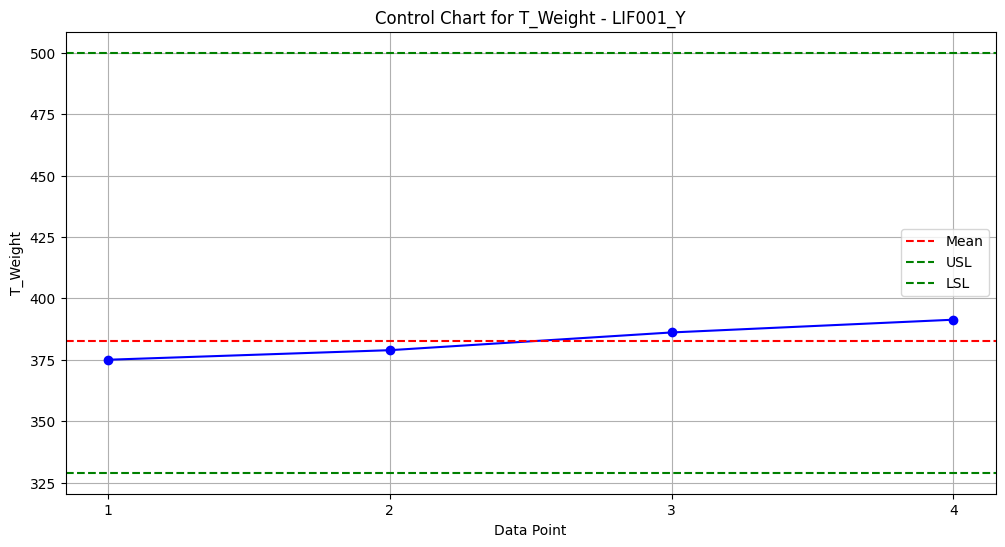

In [524]:
# plotting control chart for T_Weight - LIF001_Y
control_chart_plot(lif001_y, lif001_y_specs, 'T_Weight', 'Control Chart for T_Weight - LIF001_Y', 'T_Weight')

### The above control chart shows the Weight measurments for variant Y under product family LIF001 (product code = LIF001_Y) 
#### - All of the data points are within the specification limits   
#### - Data points show a slightly increasing pattern
#### - Mean (382.82) is relatively close to the target (410)

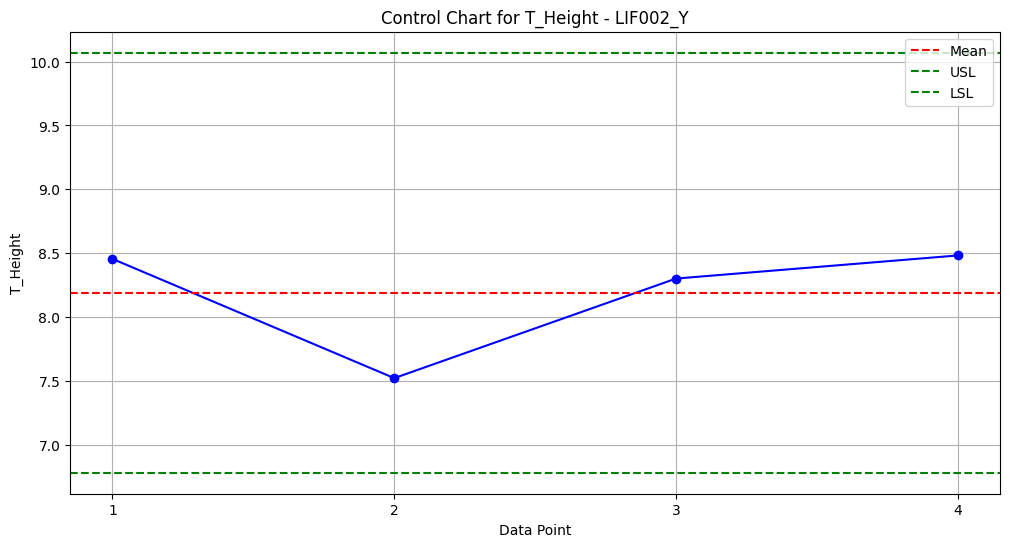

In [525]:
# plotting control chart for T_Height - LIF002_Y
control_chart_plot(lif002_y, lif002_y_specs, 'T_Height', 'Control Chart for T_Height - LIF002_Y', 'T_Height')

### The above control chart shows the Height measurments for variant Y under product family LIF002 (product code = LIF002_Y) 
#### - All of the data points are within the specification limits 
#### - Data points are randomly distributed
#### - Mean (8.18) is close to the target (8.36)

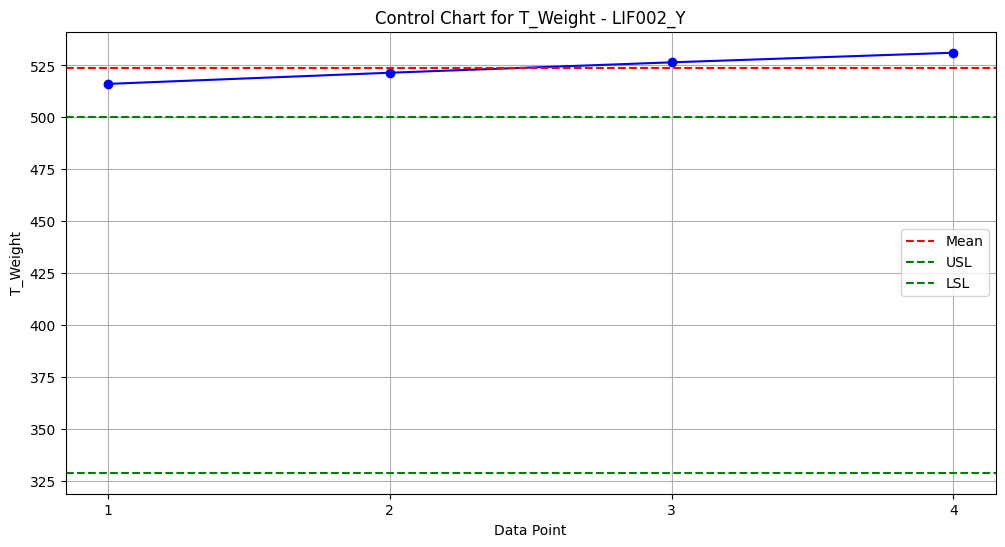

In [526]:
# plotting control chart for T_Weight - LIF002_Y
control_chart_plot(lif002_y, lif002_y_specs, 'T_Weight', 'Control Chart for T_Weight - LIF002_Y', 'T_Weight')

### The above control chart shows the Weight measurments for variant Y under product family LIF002 (product code = LIF002_Y) 

#### - All of the data points are higher than the USL 
#### - Data points show a slightly increasing pattern
#### - Mean (523.79) is far from the target (410) 

### For the variant Y, comparing the process control of the two product families based on the above control charts reveals distinct outcomes:

#### - Height Measurement: Product family LIF002 demonstrates better process control, as evidenced by all data points falling within the specification limits on the control chart.

#### - Weight Measurement: Conversely, product family LIF001 shows better process control for weight measurement, with all data points within the specification limits.

#### - Overall Comparison: Considering both measurements collectively, product family LIF001 shows better process control due to fewer data points exceeding the upper specification limit (USL).


## Question 1.4

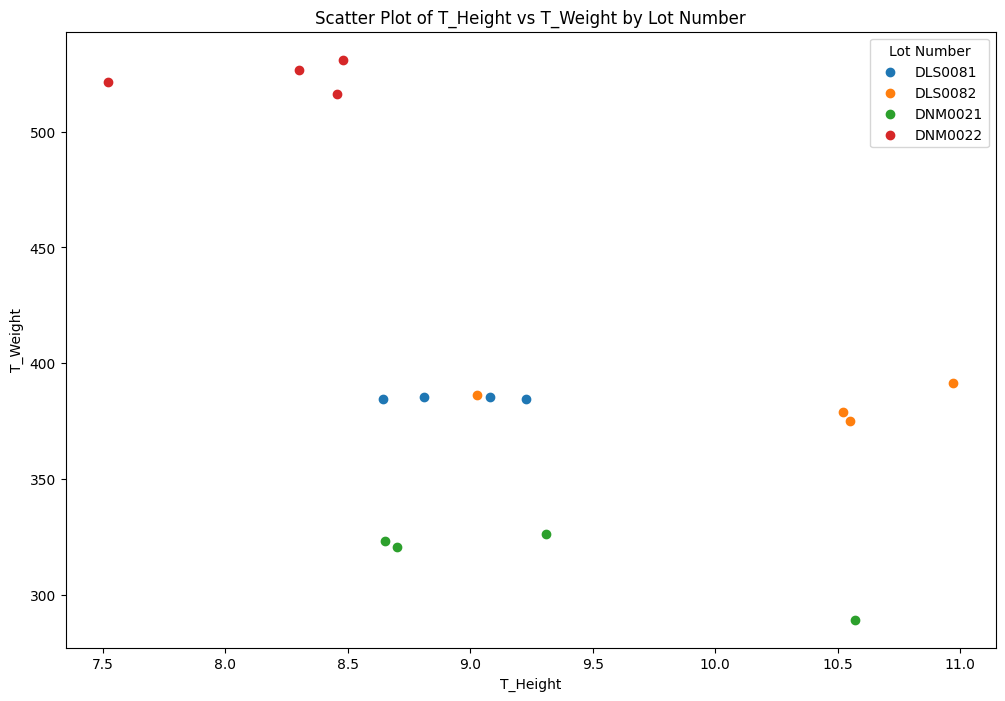

In [527]:
plt.figure(figsize=(12, 8))

# scatter plot for each lot number
for lot in measurements_df['Lot No'].unique():
    lot_data = measurements_df[measurements_df['Lot No'] == lot]
    plt.scatter(lot_data['T_Height'], lot_data['T_Weight'], label=lot)

plt.title('Scatter Plot of T_Height vs T_Weight by Lot Number')
plt.xlabel('T_Height')
plt.ylabel('T_Weight')
plt.legend(title='Lot Number')
plt.show()

### The above scatter plot illustrates the relationship between height and weight measurements across different lots, showing distinct clusters for each lot. This clustering suggests that within each lot, there is relatively low variability in both height and weight measurements, indicating consistent product characteristics within those groups.

#### Visualizing defect count by lot number and product family 

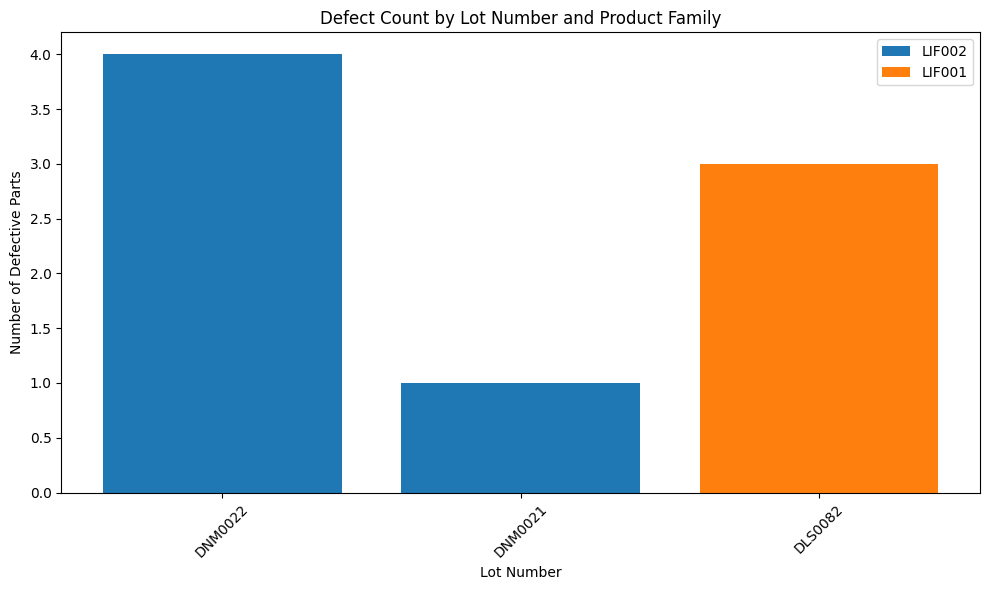

In [528]:
# counting defects by lot number and product family
defect_counts = pd.DataFrame(lot_family_defects, columns=['Lot No', 'Product Family']).value_counts().reset_index(name='Defective Count')

# plotting the bar chart
plt.figure(figsize=(10, 6))
for product_family in defect_counts['Product Family'].unique():
    subset = defect_counts[defect_counts['Product Family'] == product_family]
    plt.bar(subset['Lot No'], subset['Defective Count'], label=product_family)

plt.xlabel('Lot Number')
plt.ylabel('Number of Defective Parts')
plt.title('Defect Count by Lot Number and Product Family')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 1.5

### It is not possible to project the test variation for products 7 and 8 because we do not have height and weight measurements for variant G in the given data. Having this historical data is crucial for training models that can accurately predict test variations for future orders.